In [6]:
%load_ext autoreload
%autoreload 2

from pydrake.geometry import StartMeshcat

from iiwa_batter.tee_ball import run_tee_ball


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7003


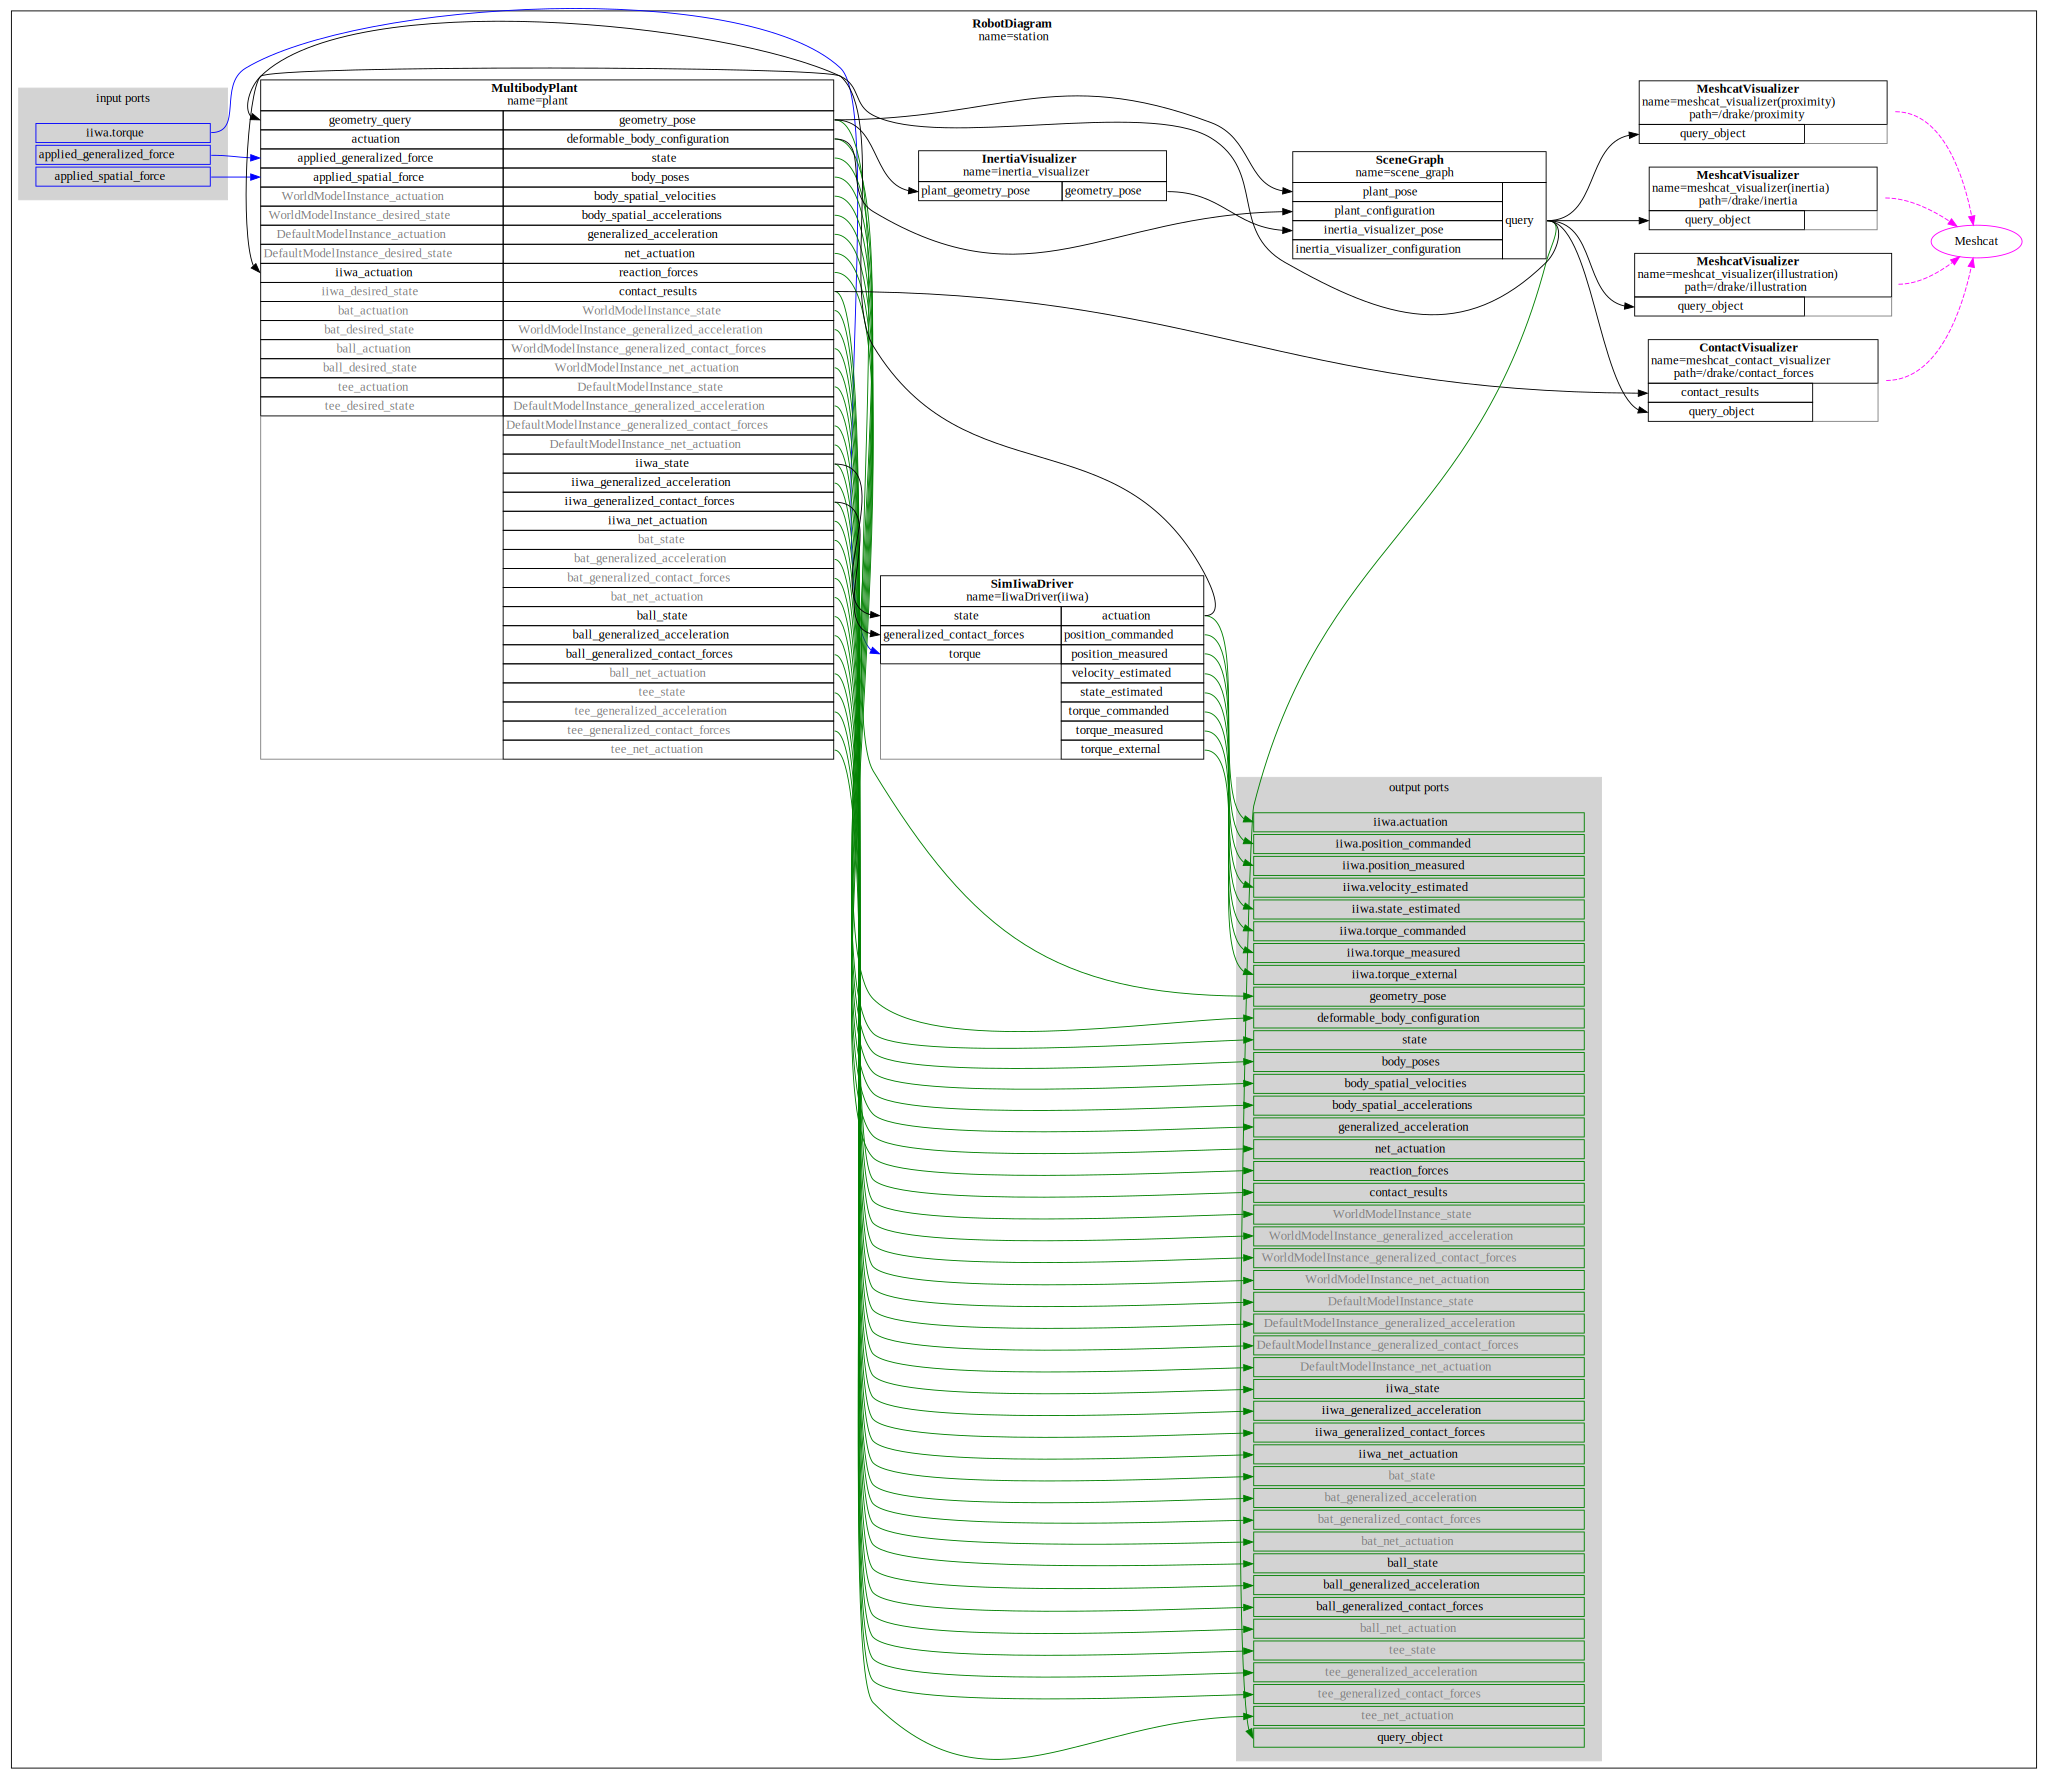

[array([0.01268934, 0.00593981, 0.00181643]), array([0.13952908, 0.06527465, 0.01993635]), array([0.26627177, 0.12449261, 0.03797585]), array([0.39291826, 0.18359088, 0.0559353 ]), array([0.51946948, 0.24256604, 0.073815  ]), array([0.64592658, 0.30141374, 0.09161511]), array([0.77229096, 0.36012842, 0.1093356 ]), array([0.89856431, 0.41870304, 0.12697627]), array([1.0247487 , 0.47712873, 0.14453664]), array([1.15084664, 0.53539459, 0.16201594]), array([1.28945808, 0.59928647, 0.18114821]), array([1.4153848 , 0.65717025, 0.19845325]), array([1.54123612, 0.71484408, 0.21567259]), array([1.66701686, 0.77228559, 0.23280385]), array([1.79273257, 0.82946895, 0.2498442 ]), array([1.91838951, 0.88636457, 0.26679027]), array([2.04399477, 0.94293888, 0.28363814]), array([2.16955626, 0.99915405, 0.30038331]), array([2.29508279, 1.0549678 , 0.31702066]), array([2.42058407, 1.11033312, 0.33354442]), array([2.55861905, 1.17065489, 0.35158164]), array([2.68410313, 1.22490329, 0.36784503]), array([2.

2.413680935755765e-05

In [5]:
run_tee_ball(meshcat, [0, 0, 0], [100, 1, 1], record_time=1, dt=1e-2)

In [9]:
import numpy as np
from iiwa_batter.iiwa_details import JOINT_POSITION_LIMITS, JOINT_EFFORT_LIMITS

# Simple sweep of parameter space

position_resolution = 2
torque_resolution = 2

joint_0_positions = np.linspace(JOINT_POSITION_LIMITS[1][0], JOINT_POSITION_LIMITS[1][1], position_resolution)
joint_3_positions = np.linspace(JOINT_POSITION_LIMITS[4][0], JOINT_POSITION_LIMITS[4][1], position_resolution)
joint_6_positions = np.linspace(JOINT_POSITION_LIMITS[7][0], JOINT_POSITION_LIMITS[7][1], position_resolution)

joint_1_torques = np.linspace(-JOINT_EFFORT_LIMITS[1], JOINT_EFFORT_LIMITS[1], torque_resolution)
joint_4_torques = np.linspace(-JOINT_EFFORT_LIMITS[4], JOINT_EFFORT_LIMITS[4], torque_resolution)
joint_7_torques = np.linspace(-JOINT_EFFORT_LIMITS[7], JOINT_EFFORT_LIMITS[7], torque_resolution)

good_swings = {}
swing_threshold = 40 # anything over 20mph, save for further study

for joint_0_position in joint_0_positions:
    for joint_3_position in joint_3_positions:
        for joint_6_position in joint_6_positions:
            for joint_1_torque in joint_1_torques:
                for joint_4_torque in joint_4_torques:
                    for joint_7_torque in joint_7_torques:
                        position = [joint_0_position, joint_3_position, joint_6_position]
                        torque = [joint_1_torque, joint_4_torque, joint_7_torque]
                        exit_velo = run_tee_ball(None, 
                                                position, 
                                                torque, 
                                                record_time=1, dt=1e-2)
                        if exit_velo > swing_threshold:
                            good_swings[exit_velo] = (position, torque)


In [18]:
# Pick one of the good swings
for key in good_swings.keys():
    (position, torque) = good_swings[key]
    exit_velo = run_tee_ball(meshcat, position, torque, 5, 1e-2)
    print(exit_velo)

# !!! 70mph exit velo with zero optimization, and off a tee. It even gets up to speed in about 0.5 seconds.
# We're going YARD on this one!

2.0422893346823056e-05
2.0447103092417648e-05
